In [1]:
import os
import pandas as pd
import geopandas
import numpy as np
import xarray as xr
from sklearn_xarray import wrap, Target
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
PathR = "D:\DOCS\PATIA\ARCHIVOS\VHI_Raw" #Lectura de archivos VHI crudos

In [3]:
RawVHI = pd.read_csv(PathR+"\\UNIFICADO.csv", index_col = 4, parse_dates = True)

In [4]:
del RawVHI["Unnamed: 0"]

# Datos crudos

In [5]:
RawVHI

,x,y,VALOR
Fecha,,,
2001-01-01,-76.972145,2.510791,0.431432
2001-01-01,-76.963162,2.510791,0.614355
2001-01-01,-76.954179,2.510791,0.624116
2001-01-01,-76.945196,2.510791,0.670600
2001-01-01,-76.972145,2.501808,0.503002
...,...,...,...
2021-12-01,-77.789612,0.687211,0.487293
2021-12-01,-77.879444,0.678228,0.438945
2021-12-01,-77.861477,0.678228,0.503288


# Geodatos

In [6]:
RawVHIGeo = geopandas.GeoDataFrame(RawVHI,geometry=geopandas.points_from_xy(RawVHI.x,RawVHI.y),crs="EPSG:4326")

In [10]:
del RawVHIGeo["x"]
del RawVHIGeo["y"]

In [11]:
RawVHIGeo 

,VALOR,geometry
Fecha,,
2001-01-01,0.431432,POINT (-76.97215 2.51079)
2001-01-01,0.614355,POINT (-76.96316 2.51079)
2001-01-01,0.624116,POINT (-76.95418 2.51079)
2001-01-01,0.670600,POINT (-76.94520 2.51079)
2001-01-01,0.503002,POINT (-76.97215 2.50181)
...,...,...
2021-12-01,0.487293,POINT (-77.78961 0.68721)
2021-12-01,0.438945,POINT (-77.87944 0.67823)
2021-12-01,0.503288,POINT (-77.86148 0.67823)


<AxesSubplot:>

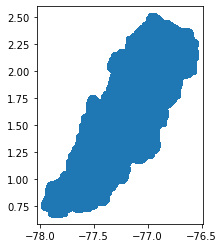

In [12]:
RawVHIGeo.plot()

# Agrupamiento de datos

In [6]:
#RawVHI.set_index(["x","y"], inplace= True, append=True, drop= False)
RawVHI.set_index(["x","y"], inplace= True, append=True)

In [7]:
RawVHI

VALOR
Fecha      x          y                 
2001-01-01 -76.972145 2.510791  0.431432
           -76.963162 2.510791  0.614355
           -76.954179 2.510791  0.624116
           -76.945196 2.510791  0.670600
           -76.972145 2.501808  0.503002
...                                  ...
2021-12-01 -77.789612 0.687211  0.487293
           -77.879444 0.678228  0.438945
           -77.861477 0.678228  0.503288
           -77.852494 0.678228  0.478480
           -77.834528 0.678228  0.384898

[3290737 rows x 1 columns]

# Cálculos

In [8]:
Promedios = RawVHI.groupby(["x","y"]).mean()

In [9]:
Promedios

VALOR
x          y                 
-77.960292 0.750093  0.515037
           0.759076  0.469701
           0.768060  0.484713
-77.951309 0.741110  0.482553
           0.750093  0.534719
...                       ...
-76.558920 2.142482  0.444869
           2.151465  0.494703
           2.178415  0.563420
           2.250280  0.672693
           2.259263  0.666111

[13544 rows x 1 columns]

In [10]:
Covarianzas = RawVHI.groupby(["x","y"]).cov()

In [11]:
Covarianzas

VALOR
x          y                       
-77.960292 0.750093 VALOR  0.026845
           0.759076 VALOR  0.028651
           0.768060 VALOR  0.023598
-77.951309 0.741110 VALOR  0.028940
           0.750093 VALOR  0.029157
...                             ...
-76.558920 2.142482 VALOR  0.032120
           2.151465 VALOR  0.033776
           2.178415 VALOR  0.024764
           2.250280 VALOR  0.012287
           2.259263 VALOR  0.008973

[13544 rows x 1 columns]

In [15]:
RawVHIGeo.groupby(pd.Grouper(freq="M")).mean()

,VALOR
Fecha,
2001-01-31,0.635868
2001-02-28,0.611741
2001-03-31,0.530273
2001-04-30,0.612589
2001-05-31,0.537826
...,...
2021-08-31,0.510306
2021-09-30,0.470451
2021-10-31,0.511375


In [46]:
3290737/32185

102.24443063538915